In [17]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go #if you have not install plotly package, please run 'pip install jupyter-plotly-dash'
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly.subplots import make_subplots
import random
# Import required packages 

from scipy.stats import skew, kurtosis

In [18]:
def load_file(colon, colon_label):
    
    colon = pd.read_csv('colonCancerData.csv', index_col=0)
    colon_label = pd.read_csv('label.csv') 

    def ConvertLabels(labels):

        column_name = 'label'
        labels.loc[colon_label[column_name] > 0] = 1
        labels.loc[colon_label[column_name] < 0] = -1

        return labels

    colon_label = ConvertLabels(colon_label)
    data_label = pd.concat([colon, colon_label], axis = 1, sort= False)

    data_label_1 = data_label[data_label['label']==1] # normal tissue
    data_label_0 = data_label[data_label['label']==-1] # tumor tissue
    
    return data_label_1, data_label_0

data_label_1, data_label_0 = load_file(colon, colon_label)

#To see the distribution of the max, min, mean, median value of different label.

def get_Data(data_label_1):
    temp_value = data_label_1.describe()
    max_value = temp_value.iloc[-1]
    max_value = max_value.drop("label")
    max_value = max_value.T
    max_value = max_value.tolist()

    min_value = temp_value.iloc[3]
    min_value = min_value.drop("label")
    min_value = min_value.T
    min_value = min_value.tolist()

    mean_value = temp_value.iloc[1]
    mean_value = mean_value.drop("label")
    mean_value = mean_value.T
    mean_value = mean_value.tolist()

    median_value = temp_value.iloc[5]
    median_value = median_value.drop("label")
    median_value = median_value.T
    median_value = median_value.tolist()

    return max_value, min_value, mean_value, median_value

max_value, min_value, mean_value, median_value = get_Data(data_label_1)

#Draw them in figure
fig_1_table = go.Figure(data=[go.Table(
        header=dict(
            values=["Max", "Min","Mean","Median"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[max_value,min_value,mean_value,median_value],
            align = "left")
    )
                      ])

fig_1_table.update_layout(width=1000, height=500,title_text="Raw data")

fig_1_table.show()

fig_1_Figure = make_subplots(rows=2, cols=2)

fig_1_Figure.add_trace(
    go.Scatter(y=max_value,name="max",mode='markers'),
    row=1, col=1
)

fig_1_Figure.add_trace(
    go.Scatter(y=min_value,name="min",mode='markers'),
    row=1, col=2
)

fig_1_Figure.add_trace(
    go.Scatter(y=mean_value,name="mean",mode='markers'),
    row=2, col=1
)


fig_1_Figure.add_trace(
    go.Scatter(y=median_value,name="median",mode='markers'),
    row=2, col=2
)

fig_1_Figure.update_layout(height=1000, width=1000,title_text="Basic plot of data")
fig_1_Figure.show()


In [19]:
max_value, min_value, mean_value, median_value = get_Data(data_label_0)

fig_0_table = go.Figure(data=[go.Table(
        header=dict(
            values=["Max", "Min","Mean","Median"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[max_value,min_value,mean_value,median_value],
            align = "left")
    )
                      ])

fig_0_table.update_layout(width=1000, height=500,title_text="Raw data")

fig_0_table.show()

fig_0_figure = make_subplots(rows=2, cols=2)

fig_0_figure.add_trace(
    go.Scatter(y=max_value,name="max",mode='markers'),
    row=1, col=1
)

fig_0_figure.add_trace(
    go.Scatter(y=min_value,name="min",mode='markers'),
    row=1, col=2
)

fig_0_figure.add_trace(
    go.Scatter(y=mean_value,name="mean",mode='markers'),
    row=2, col=1
)


fig_0_figure.add_trace(
    go.Scatter(y=median_value,name="median",mode='markers'),
    row=2, col=2
)

fig_0_figure.update_layout(height=1000, width=1000,title_text="Basic plot of data")
fig_0_figure.show()

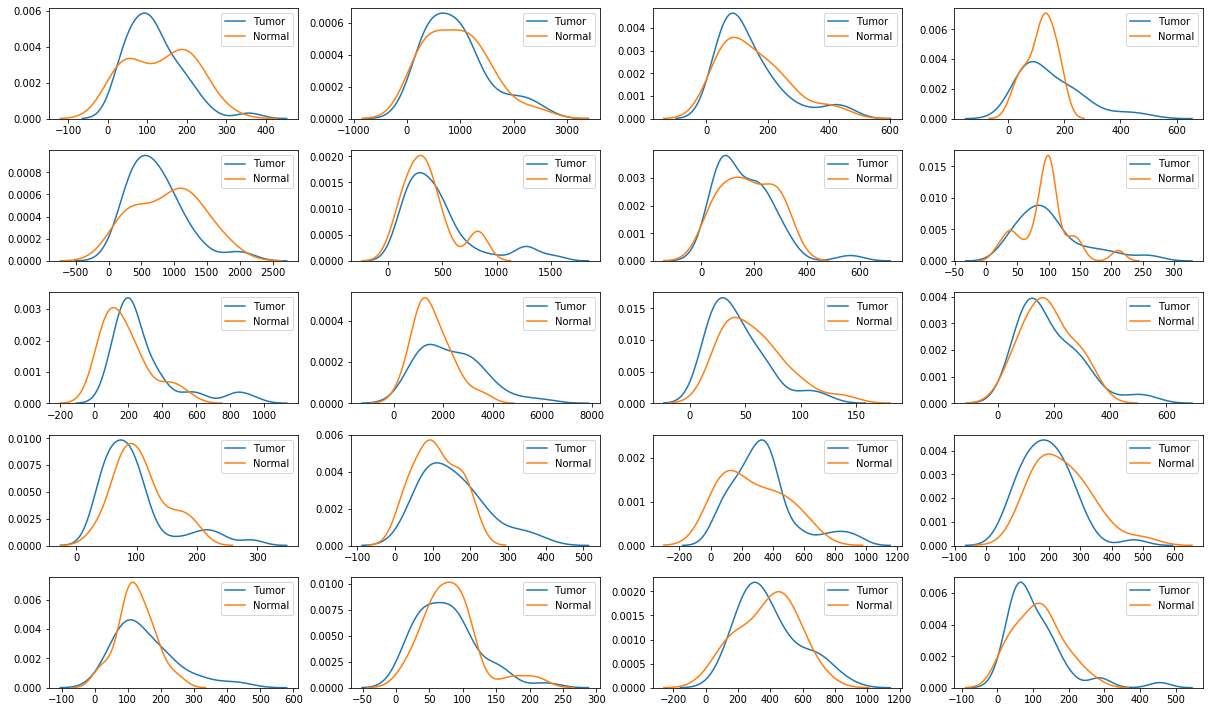

In [20]:
#Draw the kde plot.
colon = pd.read_csv('colonCancerData.csv', index_col=0) # Gene expression
colon_label = pd.read_csv('label.csv') # labels 

def ConvertLabels(labels):
    
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 'Normal'
    labels.loc[colon_label[column_name] != 'Normal'] = 'Tumor'
    
    return labels

colon_label = ConvertLabels(colon_label)
data_label = pd.concat([colon, colon_label], axis = 1, sort= False)

data_label_1 = data_label[data_label['label']=='Normal'] # normal tissue
data_label_0 = data_label[data_label['label']=='Tumor'] # tumor tissue


fig, ax = plt.subplots(5,4, figsize=(17,10))

feature_number = [str(i) for i in random.sample(range(0,2000),20)]
labels_number = ["Tumor", "Normal"]
jj = -1
for ii, feature in enumerate(feature_number):
    if ii % 4 == 0:
        jj += 1
    for label in labels_number:
        sns.kdeplot(data_label[data_label['label']==label][feature].values.reshape(-1,), \
                    ax=ax[jj][ii % 4], label=label)
fig.tight_layout()
plt.show()

In [21]:
#Draw the figure of outlier which is found by AMD
data_label_1, data_label_0 = load_file(colon, colon_label)

def collection(data_label_1):
    names = data_label_1.columns.tolist()
    AMD = []
    value = []
    outlier_count = []
    outlier_colomn_name = []
    for i in names:
        temp = data_label_1.loc[:,i]
        temp_1 = abs(temp - np.median(temp))
        temp_2 = np.median(temp_1)
        AMD.append(round(temp_2,2))
        value_temp = round(temp_1 / temp_2,2)
        flag = 0

        for j in value_temp:
            if j > temp_2:
                flag += 1
        outlier_count.append(flag)

        if flag > 0:
            outlier_colomn_name.append(i)
            
    outlier_find_table = data_label_1[outlier_colomn_name]
    collection = []
    
    for i in outlier_colomn_name:
        collection.append(outlier_find_table[i].tolist())
    
    return collection

collection_1 = collection(data_label_1)
collection_0 = collection(data_label_0)

# We can also find that in label_0, having the same outlier in the same colomn in label_1   

gene_descriptions = pd.read_csv('colonGeneDescriptions.csv')
gene_names        = gene_descriptions["1"]
collection_11 = gene_names.loc[[558,1240,1704,1809,1860,1883,1900,1969]]
collection_11 = collection_11.tolist()
collection_11

#Change the label

fig_2 = make_subplots(rows=1, cols=2)
for i in range(len(collection_1)):
    
    fig_2.add_trace(
        go.Box(y=collection_1[i],name=collection_11[i]),
        row=1,col=1
        )
    fig_2.add_trace(
        go.Box(y=collection_0[i],name=collection_11[i]),
        row=1,col=2
        )
fig_2.show()

In [22]:
#Comparing the Sample skewness and Galton's measured skewness
data_label_1, data_label_0 = load_file(colon, colon_label)

names = data_label_1.columns.tolist()
GMS_1 = []
GMS_0 = []
flag_1 = 0
flag_0 = 0
for i in names:
    temp_1 = data_label_1.loc[:,i]
    temp_0 = data_label_0.loc[:,i]
    temp_3 = round((((np.percentile(temp_1, 75) - np.percentile(temp_1, 50)) - (np.percentile(temp_1, 50) - np.percentile(temp_1, 25))) / (np.percentile(temp_1, 75) - np.percentile(temp_1, 25))),2)
    temp_4 = round((((np.percentile(temp_0, 75) - np.percentile(temp_0, 50)) - (np.percentile(temp_0, 50) - np.percentile(temp_0, 25))) / (np.percentile(temp_0, 75) - np.percentile(temp_0, 25))),2)
    GMS_1.append(temp_3)
    GMS_0.append(temp_4)
    if temp_3 > 0:
        flag_1 += 1
    if temp_4 > 0:
        flag_0 += 1

print("The number of right skewness distribution in normal tissues from Galton's measure of skewness is:{}".format(flag_1))
print("The number of right skewness distribution in tumor tissues from Galton's measure of skewness is:{}".format(flag_0))


print('The number of right skewness distribution in normal tissues from sample skewness is:{}'.format(sum(skew(data_label_1)[:-1] > 0)))
print('The number of right skewness distribution in tumor tissues from sample skewness is:{}'.format(sum(skew(data_label_0)[:-1] > 0)))

The number of right skewness distribution in normal tissues from Galton's measure of skewness is:1241
The number of right skewness distribution in tumor tissues from Galton's measure of skewness is:1643
The number of right skewness distribution in normal tissues from sample skewness is:1827
The number of right skewness distribution in tumor tissues from sample skewness is:2000


In [23]:
#Draw the scatter matrix of the gene.
data_label_1, data_label_0 = load_file(colon, colon_label)

gene_descriptions = pd.read_csv('colonGeneDescriptions.csv')
gene_names        = gene_descriptions["1"]
collection_10 = gene_names.loc[0:9]
collection_10 = collection_10.tolist()
collection_10[2] = "R39465 "
collection_10

names = data_label_1.columns.tolist()
names_10 = []
for i in names:
    if i == '10':
        break
    else:
        names_10.append(i)

data_label_1_10 = data_label_1.loc[:,names_10] 
data_label_0_10 = data_label_0.loc[:,names_10] 

for i in range(len(names_10)):
    data_label_1_10 = data_label_1_10.rename(index=str, columns={names_10[i]:collection_10[i]})
    data_label_0_10 = data_label_0_10.rename(index=str, columns={names_10[i]:collection_10[i]})


fig1 = px.scatter_matrix(data_label_1_10, dimensions = collection_10)
fig1.update_traces(diagonal_visible=False)


fig1.update_layout(
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig1.show()

fig2 = px.scatter_matrix(data_label_0_10, dimensions = collection_10)
fig2.update_traces(diagonal_visible=False)


fig2.update_layout(
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig2.show()

In [ ]:
#Count the number of the gene, which has the correlation over 0.8.
data_label_1, data_label_0 = load_file(colon, colon_label)

data_label_1n = data_label_1.drop(['label'],axis = 1)
data_label_0n = data_label_0.drop(['label'],axis = 1)

names = data_label_1.columns.tolist()
del names[-1]


count_number = []
flag_number = []

for i in range(1999):
    corr80 = []
    for j in range(1999-i):
        
        if data_label_1n[names[i]].corr(data_label_1n[names[i+j+1]]) > 0.8:
            corr80.append(names[i+j+1])
        
    if len(corr80) > 0:
        count_number.append(len(corr80))
        flag_number.append(names[i])

layout = go.Layout(
    plot_bgcolor='white')

fig = go.Figure([go.Bar(x=flag_number, y=count_number,marker=dict(color='black'))],layout=layout)


fig.show()